<a href="https://colab.research.google.com/github/Rohianon/DataminingPDF/blob/main/PDFCatalog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fitz
!pip install PyMuPDF

In [ ]:
import requests
import fitz
from bs4 import BeautifulSoup
import re
import pandas as pd
pd.set_option('display.max_columns', 500)

In [ ]:
print(fitz.__doc__)


PyMuPDF 1.19.5: Python bindings for the MuPDF 1.19.0 library.
Version date: 2022-02-01 00:00:01.
Built for Python 3.7 on linux (64-bit).



In [ ]:
url = 'https://www.mercyhurst.edu/sites/default/files/2019-2020-Undergraduate-Catalog-web.pdf'
data = requests.get(url)
# Write content in pdf file
pdf = open("2019-2020-Undergraduate-Catalog-web.pdf", 'wb')
pdf.write(data.content)
pdf.close()

In [ ]:
catalog = fitz.open('/content/2019-2020-Undergraduate-Catalog-web.pdf')

In [ ]:
catalog.page_count

282

In [ ]:
catalog.metadata

{'author': '',
 'creationDate': "D:20190821133731-04'00'",
 'creator': 'Adobe InDesign 14.0 (Macintosh)',
 'encryption': None,
 'format': 'PDF 1.7',
 'keywords': '',
 'modDate': "D:20190821161830-04'00'",
 'producer': 'Adobe PDF Library 15.0',
 'subject': '',
 'title': '',
 'trapped': ''}

In [ ]:
# get the table of contents
catalog.get_toc()

[]

In [ ]:
catalog

Document('/content/2019-2020-Undergraduate-Catalog-web.pdf')

In [ ]:
# read a random page
import random
pno = random.randint(0,catalog.page_count)
catalog.load_page(pno)

page 195 of /content/2019-2020-Undergraduate-Catalog-web.pdf

In [ ]:
page = catalog[pno]

In [ ]:
def findCourses(page):
    # load the page number input by user
    ## catalog.load_page(page) same as below
    page = catalog[page]
    # extract text as html content
    pg_content = page.get_text('html')
    # parse through beutiful soup using html.parser
    soup = BeautifulSoup(pg_content, 'html.parser')
    # use regex to find the partern of the courses
    course = re.findall('([A-Z.]+ [0-9.]+: [A-Za-z A-Za-z A-Za-z].+)',soup.get_text())
    # course = [i.split(':') for i in course]
    return course

In [ ]:
findCourses(177)

['ACCT 101:  Principles of Accounting I: Financial Accounting',
 'ACCT 102:  Principles of Accounting II: Managerial Accounting',
 'ACCT 140: Computer Applications in Accounting*',
 'ACCT 201:  Intermediate Accounting I',
 'ACCT 202:  Intermediate Accounting II',
 'ACCT 230:  Tax Accounting',
 'ACCT 335:  Corporate Tax Accounting',
 'ACCT 340:  Cost Accounting',
 'ACCT 350: Accounting for Government and Non-Profit Entities ',
 'ACCT 401:  Advanced Accounting',
 'ACCT 410:  Auditing',
 'ACCT 475: Accounting Internship',
 'ANTH 107: Language and Culture: Introduction to Anthropological ',
 'ANTH 112:  World Cultures',
 'ANTH 120:  Physical Anthropology']

In [ ]:
data = [findCourses(i) for i in range(170, catalog.page_count) if len(findCourses(i)) !=0]

In [ ]:
flat_data = [item for sublist in data for item in sublist]
flat_data

['ACCT 101:  Principles of Accounting I: Financial Accounting',
 'ACCT 102:  Principles of Accounting II: Managerial Accounting',
 'ACCT 140: Computer Applications in Accounting*',
 'ACCT 201:  Intermediate Accounting I',
 'ACCT 202:  Intermediate Accounting II',
 'ACCT 230:  Tax Accounting',
 'ACCT 335:  Corporate Tax Accounting',
 'ACCT 340:  Cost Accounting',
 'ACCT 350: Accounting for Government and Non-Profit Entities ',
 'ACCT 401:  Advanced Accounting',
 'ACCT 410:  Auditing',
 'ACCT 475: Accounting Internship',
 'ANTH 107: Language and Culture: Introduction to Anthropological ',
 'ANTH 112:  World Cultures',
 'ANTH 120:  Physical Anthropology',
 'ANTH 121:  Physical Anthropology Lab',
 'ANTH 124: Stories through Things: Anthropology and Material Culture',
 'ANTH 125: Introduction to Gender Studies',
 'ANTH 130:  Archaeology',
 'ANTH 131:  Archaeology Lab',
 'ANTH 200:  Prehistory of Eastern North America',
 'ANTH 201:  Prehistory of  Western North America',
 'ANTH 202:  Indians

In [ ]:
pattern = lambda x: re.match('[A-Z]+',x)
pattern1 = lambda x: re.match('[0-9]+',x)

In [ ]:
# pattern(data[0][2])
split1 = lambda x: x.split(': ',expand=True)




df = pd.DataFrame(flat_data, columns=['courses'])
df.head()

,courses
0,ACCT 101: Principles of Accounting I: Financi...
1,ACCT 102: Principles of Accounting II: Manage...
2,ACCT 140: Computer Applications in Accounting*
3,ACCT 201: Intermediate Accounting I
4,ACCT 202: Intermediate Accounting II


# 

# Data manipulation using pandas


In [ ]:
df[['c','title']]=df.courses.str.split(': ',n=1,expand=True,)
df.drop(columns=['courses'], inplace=True)
df.head()

,c,title
0,ACCT 101,Principles of Accounting I: Financial Accounting
1,ACCT 102,Principles of Accounting II: Managerial Accou...
2,ACCT 140,Computer Applications in Accounting*
3,ACCT 201,Intermediate Accounting I
4,ACCT 202,Intermediate Accounting II


In [ ]:
df[['prefix','number']]=df.c.str.split(' ',n=1,expand=True,)
df.drop(columns=['c'], inplace=True)
df.head()

,title,prefix,number
0,Principles of Accounting I: Financial Accounting,ACCT,101
1,Principles of Accounting II: Managerial Accou...,ACCT,102
2,Computer Applications in Accounting*,ACCT,140
3,Intermediate Accounting I,ACCT,201
4,Intermediate Accounting II,ACCT,202


In [ ]:
# Reoder the columns
df = df[['prefix','number','title']]

In [ ]:
# Final Data
df

,prefix,number,title
0,ACCT,101,Principles of Accounting I: Financial Accounting
1,ACCT,102,Principles of Accounting II: Managerial Accou...
2,ACCT,140,Computer Applications in Accounting*
3,ACCT,201,Intermediate Accounting I
4,ACCT,202,Intermediate Accounting II
...,...,...,...
1331,WL,312,Second Language Acquisition
1332,WL,314,Introduction to Sociolinguistics
1333,WL,501,Culturally and Linguistically Diverse Learners
1334,WL,512,Second-Language Acquisition


# Data Visualization

In [ ]:
def remove_pattern(input_text,pattern):
    r= re.findall(pattern, input_text)
    for i in r:
        input_text = re.sub(i, '', input_text)
    return input_text

In [ ]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string

text = df.title 
text = text.str.replace("[^a-zA-Z#]"," ")
text = text.apply(lambda x: ' '.join([w for w in x.split() \
                    if len(w)>3])) #removing words whose length is less than 3 words
text = text.apply(lambda x:x.split()) #it will split all words

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys



In [ ]:
# from nltk.stem.porter import *
# stemmer = PorterStemmer()
# tokenized_text = text.apply(lambda x: [stemmer.stem(i) for i in x])

In [ ]:
# #now let's combine these tokens back

# for i in range(len(tokenized_text)):
#     tokenized_text[i] = ' '.join(tokenized_text[i]) #concat all words into one sentence
df['tokenized_text'] = text
text = ' '.join(sum([text for text in text], []))

In [ ]:
text

'Principles Accounting Financial Accounting Principles Accounting Managerial Accounting Computer Applications Accounting Intermediate Accounting Intermediate Accounting Accounting Corporate Accounting Cost Accounting Accounting Government Profit Entities Advanced Accounting Auditing Accounting Internship Language Culture Introduction Anthropological World Cultures Physical Anthropology Physical Anthropology Stories through Things Anthropology Material Culture Introduction Gender Studies Archaeology Archaeology Prehistory Eastern North America Prehistory Western North America Indians Eastern North America Indians Western North America Cultures Contact Historic Archaeology Mesoamerican Prehistory Early European Prehistory Later European Prehistory Biblical Archaeology Eastern Prehistory Plants People Concepts Archaeology Native Americans Contemporary Society Public Archaeology Archaeological Field Methods Archaeology Field Methods Ethnographic Field Methods Ethnographic Field Methods Lit

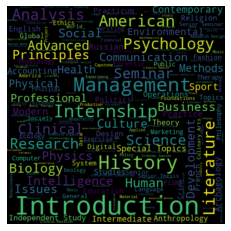

In [ ]:
# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


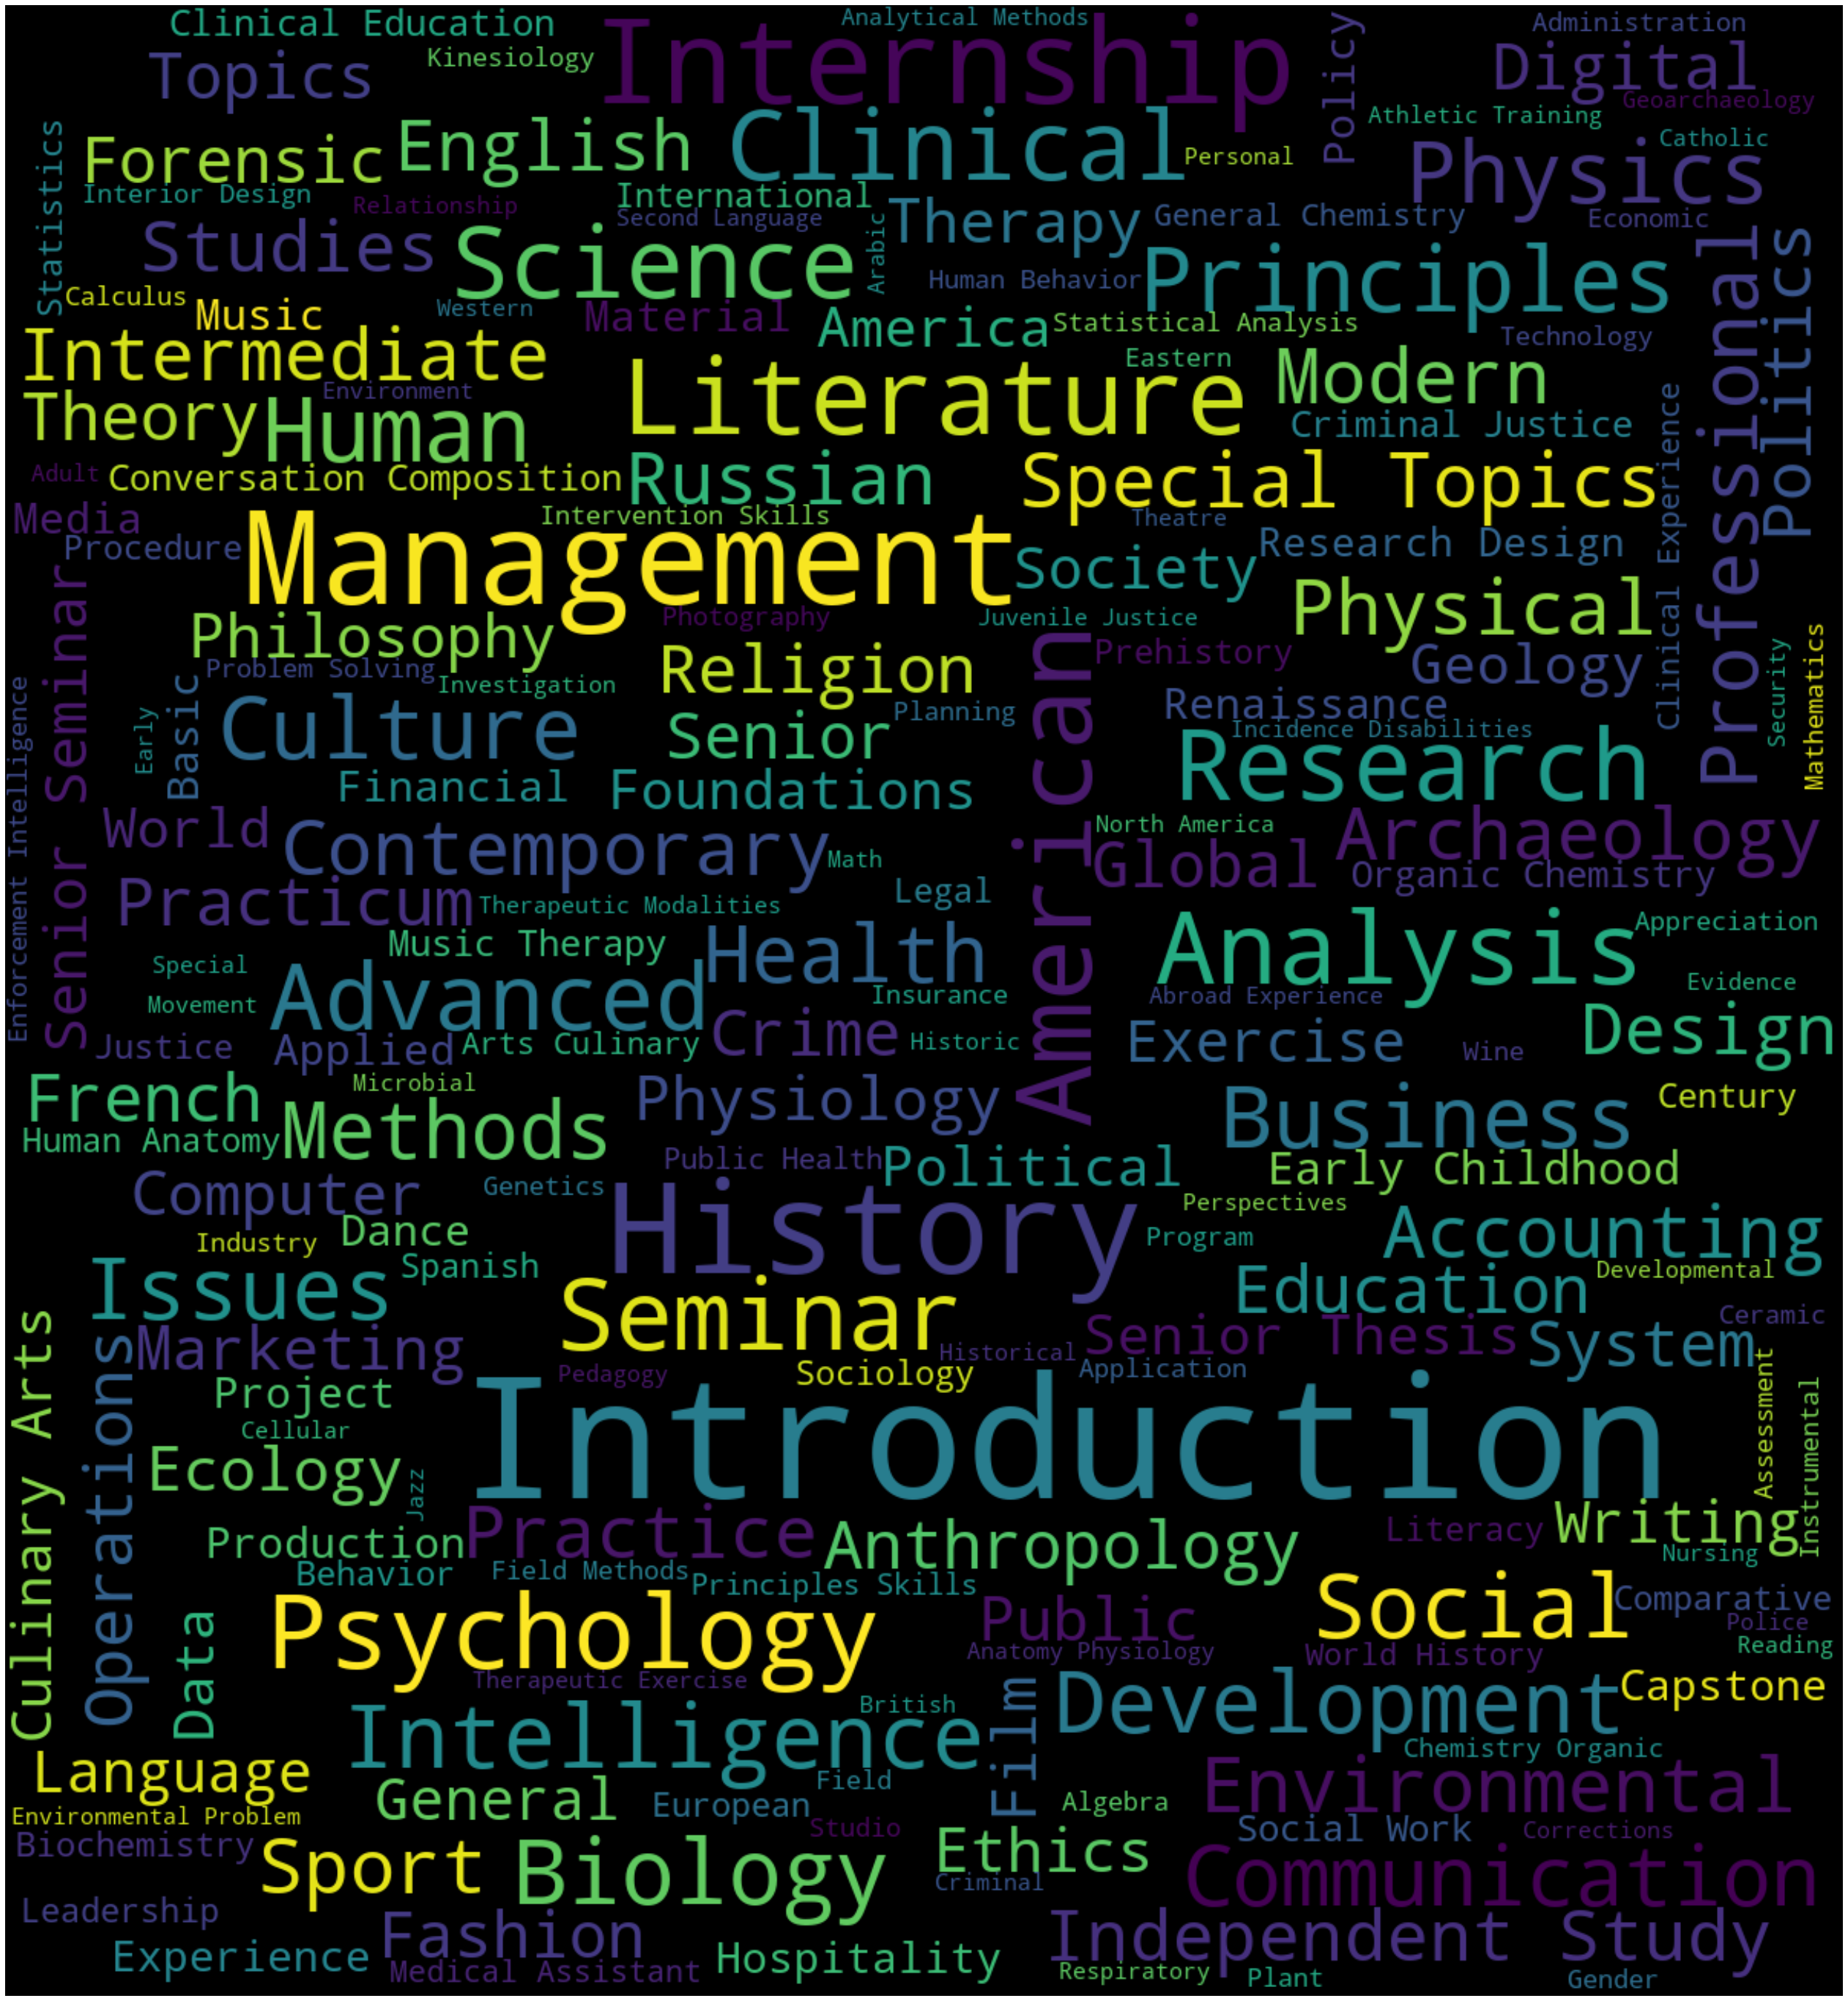

In [ ]:
wordcloud = WordCloud(width=1200,height=1300,random_state=21,max_font_size=110).generate(text)
plt.figure(figsize=(50,50))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
df.to_csv('courses.csv',index=0)

In [ ]:
## Thanks for following through